In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-prime/amazon_prime_titles.csv


# The dataset contains the data about content streaming on Amazon Prime platform which contain columns like: show_id, title, type, director, cast, country, date_added, release_year, rating, duration, listed_in, description

In [52]:
amazon = pd.read_csv("/kaggle/input/amazon-prime/amazon_prime_titles.csv")
amazon

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."


In [53]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


#### From the above data, we could see that the columns date_added and country have almost 98% and 93% data missing respectively. Since we could not find appropriate data, one of the solution is to drop the columns for better analysis.
#### The column - description has strings of characters in it. Moreover drawing analysis from description is not rewarding. Hence we will drop that column as well

In [54]:
amazon.drop(['country','date_added','description','show_id'], axis=1, inplace=True)
amazon

,type,title,director,cast,release_year,rating,duration,listed_in
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",2014,NaN,113 min,"Comedy, Drama"
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018,13+,110 min,"Drama, International"
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",2017,NaN,74 min,"Action, Drama, Suspense"
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",2014,NaN,69 min,Documentary
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",1989,NaN,45 min,"Drama, Fantasy"
...,...,...,...,...,...,...,...,...
9663,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",1940,7+,60 min,Comedy
9664,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",2018,13+,4 Seasons,TV Shows
9665,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",2008,R,90 min,Action
9666,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",2021,TV-MA,1 Season,"Drama, Sports"


In [55]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          9668 non-null   object
 1   title         9668 non-null   object
 2   director      7586 non-null   object
 3   cast          8435 non-null   object
 4   release_year  9668 non-null   int64 
 5   rating        9331 non-null   object
 6   duration      9668 non-null   object
 7   listed_in     9668 non-null   object
dtypes: int64(1), object(7)
memory usage: 604.4+ KB


In [56]:
amazon['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [57]:
amazon['title'].nunique()

9668

In [58]:
amazon['director'].nunique()

5774

#### There are few directors and cast members information missing. Hence we will fill that with 'Unknown' string

In [59]:
amazon['director'].fillna("Unknown", inplace=True)
amazon['cast'].fillna("Unknown", inplace=True)
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          9668 non-null   object
 1   title         9668 non-null   object
 2   director      9668 non-null   object
 3   cast          9668 non-null   object
 4   release_year  9668 non-null   int64 
 5   rating        9331 non-null   object
 6   duration      9668 non-null   object
 7   listed_in     9668 non-null   object
dtypes: int64(1), object(7)
memory usage: 604.4+ KB


#### The release_year column has data in integer format which isn't desirable for analyzing data for better insights. If we convert the column from integer to datetime directly, it will display different values. Hence we first lock the data by converting it into string and then convert the string into datetime values

In [60]:
amazon['release_year'] = amazon['release_year'].astype(str)
amazon['release_year'] = pd.to_datetime(amazon['release_year'], format='%Y')
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          9668 non-null   object        
 1   title         9668 non-null   object        
 2   director      9668 non-null   object        
 3   cast          9668 non-null   object        
 4   release_year  9668 non-null   datetime64[ns]
 5   rating        9331 non-null   object        
 6   duration      9668 non-null   object        
 7   listed_in     9668 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 604.4+ KB


In [61]:
amazon

,type,title,director,cast,release_year,rating,duration,listed_in
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",2014-01-01,NaN,113 min,"Comedy, Drama"
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018-01-01,13+,110 min,"Drama, International"
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",2017-01-01,NaN,74 min,"Action, Drama, Suspense"
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",2014-01-01,NaN,69 min,Documentary
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",1989-01-01,NaN,45 min,"Drama, Fantasy"
...,...,...,...,...,...,...,...,...
9663,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",1940-01-01,7+,60 min,Comedy
9664,TV Show,Planet Patrol,Unknown,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",2018-01-01,13+,4 Seasons,TV Shows
9665,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",2008-01-01,R,90 min,Action
9666,TV Show,Maradona: Blessed Dream,Unknown,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",2021-01-01,TV-MA,1 Season,"Drama, Sports"


In [62]:
amazon['rating'].unique()

array([nan, '13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR', '16+',
       'TV-PG', '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA', 'G',
       'PG', 'NC-17', 'UNRATED', '16', 'AGES_16_', 'AGES_18_', 'ALL_AGES',
       'NOT_RATE'], dtype=object)

#### First let's fill all the null values with any of the unique rating given above

In [63]:
amazon['rating'].fillna("PG-13", inplace=True)
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          9668 non-null   object        
 1   title         9668 non-null   object        
 2   director      9668 non-null   object        
 3   cast          9668 non-null   object        
 4   release_year  9668 non-null   datetime64[ns]
 5   rating        9668 non-null   object        
 6   duration      9668 non-null   object        
 7   listed_in     9668 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 604.4+ KB


#### Now we will fix the rating values. There are numerous rating values in which two or more are regarded as same rating. So we will fix that to generate better insights

In [64]:
amazon['rating'].unique()

array(['PG-13', '13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR', '16+',
       'TV-PG', '7+', 'TV-14', 'TV-NR', 'TV-G', 'TV-MA', 'G', 'PG',
       'NC-17', 'UNRATED', '16', 'AGES_16_', 'AGES_18_', 'ALL_AGES',
       'NOT_RATE'], dtype=object)

In [65]:
rating_map = {
    'PG-13': 'PG-13',
    '13+': 'PG-13',
    'ALL': 'G',
    '18+': 'NC-17',
    'R': 'R',
    'TV-Y': 'G',
    'TV-Y7': 'PG',
    'NR': 'UNRATED',
    '16+': 'PG-13',
    'TV-PG': 'PG',
    '7+': 'G',
    'TV-14': 'PG-13',
    'TV-NR': 'UNRATED',
    'TV-G': 'G',
    'TV-MA': 'NC-17',
    'G': 'G',
    'PG': 'PG',
    'NC-17': 'NC-17',
    'UNRATED': 'UNRATED',
    '16': 'PG-13',
    'AGES_16_': 'PG-13',
    'AGES_18_': 'NC-17',
    'ALL_AGES': 'G',
    'NOT_RATE': 'UNRATED'
}
amazon['rating'] = amazon['rating'].map(rating_map)
amazon['rating'].unique()

array(['PG-13', 'G', 'NC-17', 'R', 'PG', 'UNRATED'], dtype=object)

In [66]:
amazon['duration'].nunique()

219

In [67]:
amazon['duration'].unique()

array(['113 min', '110 min', '74 min', '69 min', '45 min', '52 min',
       '98 min', '131 min', '87 min', '92 min', '88 min', '93 min',
       '94 min', '46 min', '96 min', '1 Season', '104 min', '62 min',
       '50 min', '3 Seasons', '2 Seasons', '86 min', '36 min', '37 min',
       '103 min', '9 min', '18 min', '14 min', '20 min', '19 min',
       '22 min', '60 min', '6 min', '54 min', '5 min', '84 min',
       '126 min', '125 min', '109 min', '89 min', '85 min', '56 min',
       '40 min', '111 min', '33 min', '34 min', '95 min', '99 min',
       '78 min', '4 Seasons', '77 min', '55 min', '53 min', '115 min',
       '58 min', '49 min', '135 min', '91 min', '64 min', '59 min',
       '48 min', '122 min', '90 min', '102 min', '65 min', '114 min',
       '136 min', '70 min', '138 min', '100 min', '480 min', '4 min',
       '30 min', '152 min', '68 min', '57 min', '7 Seasons', '31 min',
       '151 min', '149 min', '9 Seasons', '141 min', '121 min', '79 min',
       '140 min', '51 min'

In [68]:
amazon['duration_min'] = amazon['duration'].str.extract('(\d+)', expand=False).astype(int)

# Replace the duration value for TV shows with 40
amazon.loc[amazon['type'] == 'TV Show', 'duration_min'] = 40

# Create a new column for the number of seasons
amazon['num_seasons'] = None
amazon.loc[amazon['type'] == 'TV Show', 'num_seasons'] = amazon['duration'].str.extract('(\d+)', expand=False).astype(int)
amazon.drop('duration', axis=1, inplace=True)
amazon

,type,title,director,cast,release_year,rating,listed_in,duration_min,num_seasons
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",2014-01-01,PG-13,"Comedy, Drama",113,None
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018-01-01,PG-13,"Drama, International",110,None
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",2017-01-01,PG-13,"Action, Drama, Suspense",74,None
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",2014-01-01,PG-13,Documentary,69,None
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",1989-01-01,PG-13,"Drama, Fantasy",45,None
...,...,...,...,...,...,...,...,...,...
9663,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",1940-01-01,G,Comedy,60,None
9664,TV Show,Planet Patrol,Unknown,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",2018-01-01,PG-13,TV Shows,40,4
9665,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",2008-01-01,R,Action,90,None
9666,TV Show,Maradona: Blessed Dream,Unknown,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",2021-01-01,NC-17,"Drama, Sports",40,1


In [69]:
amazon['listed_in1'] = amazon['listed_in'].str.split(',')
amazon

,type,title,director,cast,release_year,rating,listed_in,duration_min,num_seasons,listed_in1
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",2014-01-01,PG-13,"Comedy, Drama",113,None,"[Comedy, Drama]"
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018-01-01,PG-13,"Drama, International",110,None,"[Drama, International]"
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",2017-01-01,PG-13,"Action, Drama, Suspense",74,None,"[Action, Drama, Suspense]"
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",2014-01-01,PG-13,Documentary,69,None,[Documentary]
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",1989-01-01,PG-13,"Drama, Fantasy",45,None,"[Drama, Fantasy]"
...,...,...,...,...,...,...,...,...,...,...
9663,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",1940-01-01,G,Comedy,60,None,[Comedy]
9664,TV Show,Planet Patrol,Unknown,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",2018-01-01,PG-13,TV Shows,40,4,[TV Shows]
9665,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",2008-01-01,R,Action,90,None,[Action]
9666,TV Show,Maradona: Blessed Dream,Unknown,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",2021-01-01,NC-17,"Drama, Sports",40,1,"[Drama, Sports]"


In [70]:
amazon['num_categories'] = amazon['listed_in1'].apply(len)
amazon

,type,title,director,cast,release_year,rating,listed_in,duration_min,num_seasons,listed_in1,num_categories
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",2014-01-01,PG-13,"Comedy, Drama",113,None,"[Comedy, Drama]",2
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018-01-01,PG-13,"Drama, International",110,None,"[Drama, International]",2
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",2017-01-01,PG-13,"Action, Drama, Suspense",74,None,"[Action, Drama, Suspense]",3
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",2014-01-01,PG-13,Documentary,69,None,[Documentary],1
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",1989-01-01,PG-13,"Drama, Fantasy",45,None,"[Drama, Fantasy]",2
...,...,...,...,...,...,...,...,...,...,...,...
9663,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",1940-01-01,G,Comedy,60,None,[Comedy],1
9664,TV Show,Planet Patrol,Unknown,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",2018-01-01,PG-13,TV Shows,40,4,[TV Shows],1
9665,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",2008-01-01,R,Action,90,None,[Action],1
9666,TV Show,Maradona: Blessed Dream,Unknown,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",2021-01-01,NC-17,"Drama, Sports",40,1,"[Drama, Sports]",2


In [71]:
amazon.describe()

,duration_min,num_categories
count,9668.000000,9668.000000
mean,81.471969,1.893773
std,41.507712,0.948662
min,0.000000,1.000000
25%,41.000000,1.000000
50%,86.000000,2.000000
75%,101.000000,2.000000
max,601.000000,5.000000


#### The maximum number of categories are 5. Hence we will create 5 columns for each category

In [72]:
amazon['category1'] = amazon['listed_in1'].str[0]
amazon

,type,title,director,cast,release_year,rating,listed_in,duration_min,num_seasons,listed_in1,num_categories,category1
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",2014-01-01,PG-13,"Comedy, Drama",113,None,"[Comedy, Drama]",2,Comedy
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018-01-01,PG-13,"Drama, International",110,None,"[Drama, International]",2,Drama
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",2017-01-01,PG-13,"Action, Drama, Suspense",74,None,"[Action, Drama, Suspense]",3,Action
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",2014-01-01,PG-13,Documentary,69,None,[Documentary],1,Documentary
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",1989-01-01,PG-13,"Drama, Fantasy",45,None,"[Drama, Fantasy]",2,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...
9663,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",1940-01-01,G,Comedy,60,None,[Comedy],1,Comedy
9664,TV Show,Planet Patrol,Unknown,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",2018-01-01,PG-13,TV Shows,40,4,[TV Shows],1,TV Shows
9665,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",2008-01-01,R,Action,90,None,[Action],1,Action
9666,TV Show,Maradona: Blessed Dream,Unknown,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",2021-01-01,NC-17,"Drama, Sports",40,1,"[Drama, Sports]",2,Drama


In [73]:
amazon['category2'] = amazon['listed_in1'].str[1]
amazon

,type,title,director,cast,release_year,rating,listed_in,duration_min,num_seasons,listed_in1,num_categories,category1,category2
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",2014-01-01,PG-13,"Comedy, Drama",113,None,"[Comedy, Drama]",2,Comedy,Drama
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018-01-01,PG-13,"Drama, International",110,None,"[Drama, International]",2,Drama,International
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",2017-01-01,PG-13,"Action, Drama, Suspense",74,None,"[Action, Drama, Suspense]",3,Action,Drama
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",2014-01-01,PG-13,Documentary,69,None,[Documentary],1,Documentary,NaN
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",1989-01-01,PG-13,"Drama, Fantasy",45,None,"[Drama, Fantasy]",2,Drama,Fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",1940-01-01,G,Comedy,60,None,[Comedy],1,Comedy,NaN
9664,TV Show,Planet Patrol,Unknown,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",2018-01-01,PG-13,TV Shows,40,4,[TV Shows],1,TV Shows,NaN
9665,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",2008-01-01,R,Action,90,None,[Action],1,Action,NaN
9666,TV Show,Maradona: Blessed Dream,Unknown,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",2021-01-01,NC-17,"Drama, Sports",40,1,"[Drama, Sports]",2,Drama,Sports


In [74]:
amazon['category3'] = amazon['listed_in1'].str[2]
amazon['category4'] = amazon['listed_in1'].str[3]
amazon['category5'] = amazon['listed_in1'].str[4]
amazon

,type,title,director,cast,release_year,rating,listed_in,duration_min,num_seasons,listed_in1,num_categories,category1,category2,category3,category4,category5
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",2014-01-01,PG-13,"Comedy, Drama",113,None,"[Comedy, Drama]",2,Comedy,Drama,NaN,NaN,NaN
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018-01-01,PG-13,"Drama, International",110,None,"[Drama, International]",2,Drama,International,NaN,NaN,NaN
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",2017-01-01,PG-13,"Action, Drama, Suspense",74,None,"[Action, Drama, Suspense]",3,Action,Drama,Suspense,NaN,NaN
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",2014-01-01,PG-13,Documentary,69,None,[Documentary],1,Documentary,NaN,NaN,NaN,NaN
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",1989-01-01,PG-13,"Drama, Fantasy",45,None,"[Drama, Fantasy]",2,Drama,Fantasy,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",1940-01-01,G,Comedy,60,None,[Comedy],1,Comedy,NaN,NaN,NaN,NaN
9664,TV Show,Planet Patrol,Unknown,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",2018-01-01,PG-13,TV Shows,40,4,[TV Shows],1,TV Shows,NaN,NaN,NaN,NaN
9665,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",2008-01-01,R,Action,90,None,[Action],1,Action,NaN,NaN,NaN,NaN
9666,TV Show,Maradona: Blessed Dream,Unknown,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",2021-01-01,NC-17,"Drama, Sports",40,1,"[Drama, Sports]",2,Drama,Sports,NaN,NaN,NaN


In [75]:
amazon.drop(['listed_in','listed_in1'], axis=1, inplace=True)
amazon = amazon.fillna("Not available")
amazon

,type,title,director,cast,release_year,rating,duration_min,num_seasons,num_categories,category1,category2,category3,category4,category5
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",2014-01-01,PG-13,113,Not available,2,Comedy,Drama,Not available,Not available,Not available
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018-01-01,PG-13,110,Not available,2,Drama,International,Not available,Not available,Not available
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",2017-01-01,PG-13,74,Not available,3,Action,Drama,Suspense,Not available,Not available
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",2014-01-01,PG-13,69,Not available,1,Documentary,Not available,Not available,Not available,Not available
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",1989-01-01,PG-13,45,Not available,2,Drama,Fantasy,Not available,Not available,Not available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",1940-01-01,G,60,Not available,1,Comedy,Not available,Not available,Not available,Not available
9664,TV Show,Planet Patrol,Unknown,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",2018-01-01,PG-13,40,4,1,TV Shows,Not available,Not available,Not available,Not available
9665,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",2008-01-01,R,90,Not available,1,Action,Not available,Not available,Not available,Not available
9666,TV Show,Maradona: Blessed Dream,Unknown,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",2021-01-01,NC-17,40,1,2,Drama,Sports,Not available,Not available,Not available


In [76]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   type            9668 non-null   object        
 1   title           9668 non-null   object        
 2   director        9668 non-null   object        
 3   cast            9668 non-null   object        
 4   release_year    9668 non-null   datetime64[ns]
 5   rating          9668 non-null   object        
 6   duration_min    9668 non-null   int64         
 7   num_seasons     9668 non-null   object        
 8   num_categories  9668 non-null   int64         
 9   category1       9668 non-null   object        
 10  category2       9668 non-null   object        
 11  category3       9668 non-null   object        
 12  category4       9668 non-null   object        
 13  category5       9668 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage:

#### All the data has been cleaned and ready to be analyzed
#### Now the goal is to analyze the data to derive insights from the dataset

## 1) Finding how much content of each type is available on the platform?

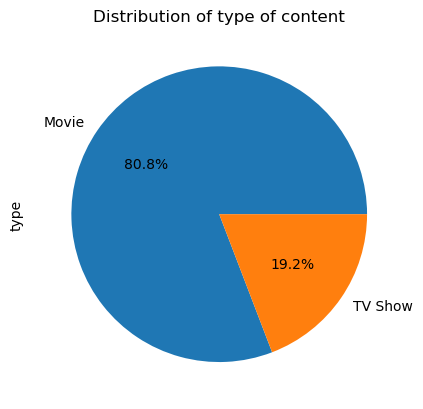

In [79]:
import matplotlib.pyplot as plt

counts = amazon['type'].value_counts()

# Plot a pie chart of the frequency counts
counts.plot(kind='pie', autopct='%1.1f%%')

# Add a title to the plot
plt.title("Distribution of type of content")

# Show the plot
plt.show()

#### From the above plot, it could be seen that the majority of the content is of type - Movies

## 2) How many movies/shows were released in a particular year or which year holds for most releases that's available on Amazon prime?

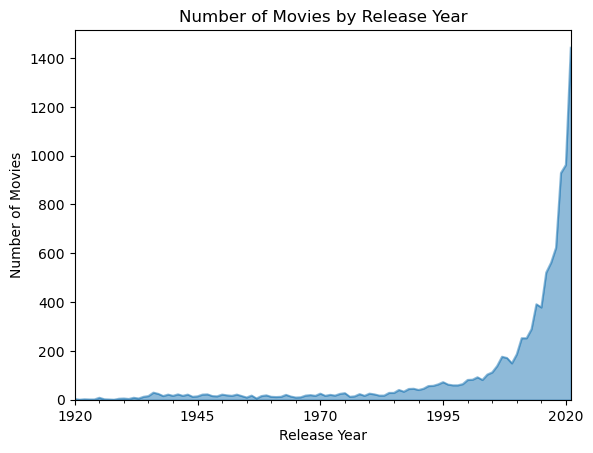

In [84]:
amazon['release_year'] = pd.to_datetime(amazon['release_year'], format='%Y')

# Set the release_year column as the index
amazon.set_index('release_year', inplace=True)

# Create a time series of the counts of movies by year
ts = amazon.groupby(pd.Grouper(freq='Y')).size()

# Create a stacked area chart of the time series
ts.plot(kind='area', stacked=True, alpha=0.5)

# Set the title and axis labels
plt.title('Number of Movies by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')

plt.show()

#### The majority of the content available on the platform - Amazon Prime are released in the latest year of the dataset - 2020

## 3) How many of each rating content is available on the platform?

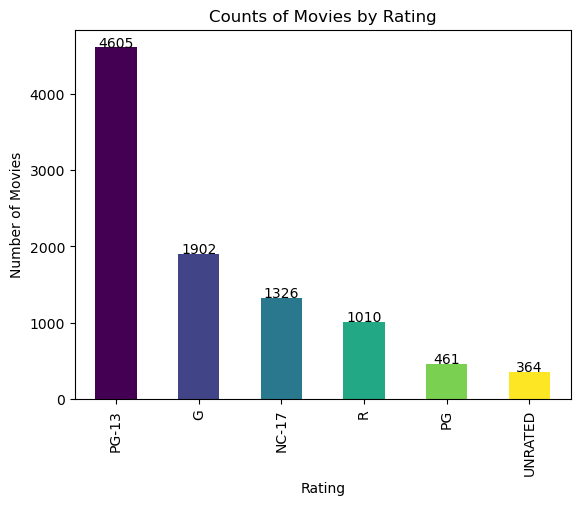

In [86]:
rating_counts = amazon['rating'].value_counts()
colors = plt.cm.viridis(np.linspace(0, 1, len(rating_counts)))

# Create a bar chart of the ratings and their counts
ax = rating_counts.plot(kind='bar', color=colors)

# Set the title and axis labels
ax.set_title('Counts of Movies by Rating')
ax.set_xlabel('Rating')
ax.set_ylabel('Number of Movies')

# Add the counts as text labels above the bars
for i, v in enumerate(rating_counts):
    ax.text(i, v+5, str(v), ha='center')

# Show the plot
plt.show()

#### From the above graph, it could be concluded that the content of rating - PG-13 is highly available on the platform

## 4) What is the duration of the movies which have highest number of movies?

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


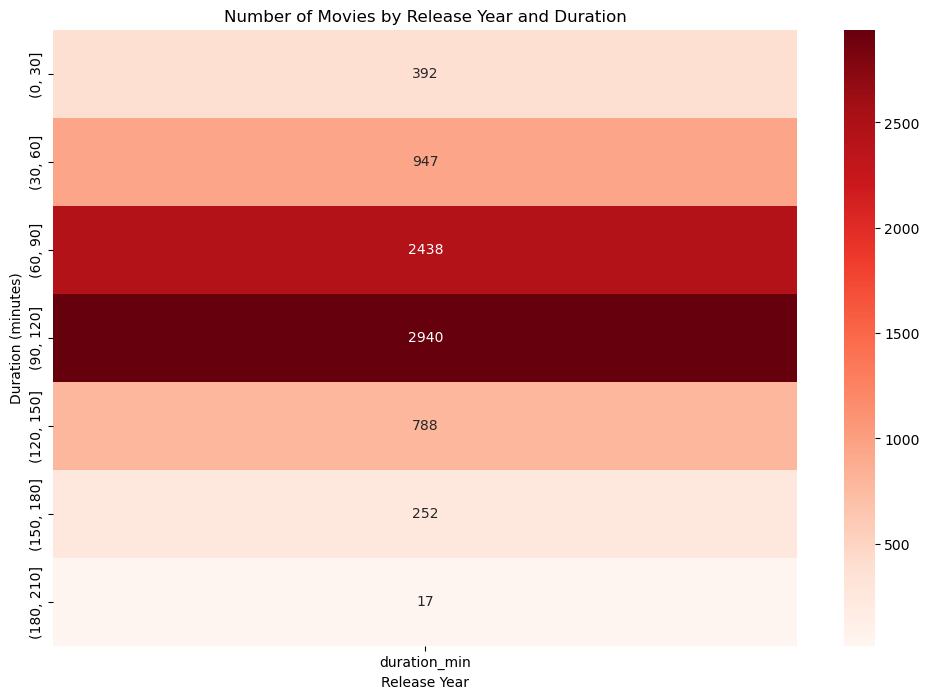

In [94]:
movies = amazon[amazon['type'] == 'Movie']

bins = pd.IntervalIndex.from_tuples([(0, 30), (30, 60), (60, 90), (90, 120), (120, 150), (150, 180), (180, 210)])

# Bin the duration_min column
movies['duration_bin'] = pd.cut(movies['duration_min'], bins)

# Create a pivot table with duration_bin as the index and columns
pivot = pd.pivot_table(movies, values='duration_min', index='duration_bin',  aggfunc='count')

# Create the heatmap using the pivot table
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='Reds', annot=True, fmt='g')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.title('Number of Movies by Release Year and Duration')
plt.show()

#### From the above heatmap, it could be concluded that the movies of duration length between 60-120 are highest

## 5) Which genre content is highly available on the platform?

Text(0.5, 1.0, 'Number of titles in each category')

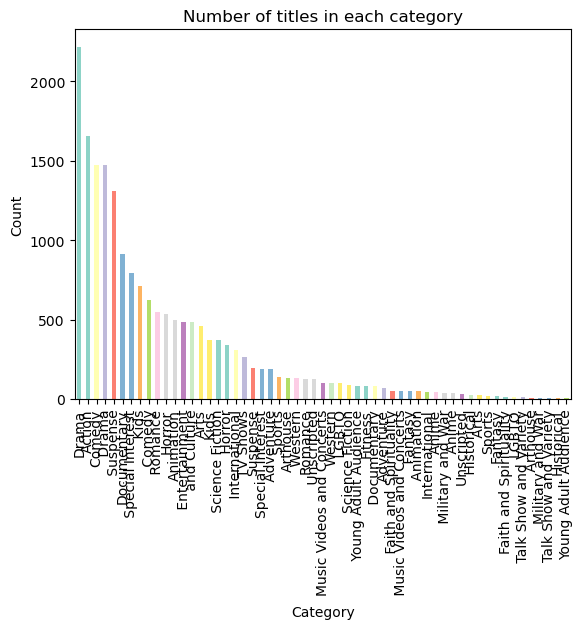

In [97]:
categories = pd.concat([amazon['category1'], amazon['category2'], amazon['category3'], amazon['category4'], amazon['category5']]).fillna('Not available')

# Get value counts of each category
category_counts = categories.value_counts()

category_counts = category_counts.drop('Not available')

# Create a bar plot of the category counts
category_counts.plot(kind='bar', stacked=True, color=plt.cm.Set3(np.linspace(0, 1, 16)))

# Add axis labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of titles in each category')

#### The platform has higher number of contents from the genres - Drama, Action, Comedy, Suspense etc